## **Initial Design Space**

To get recommendations for novel data to sample in order to enhance an emulator, a general assumption is that a surrogate model exists. This need not be the case. There are applications where it is necessary to start with some particular scheme of sampling to effectively span the entire design space at hand. `twinLab` can do this with a simple call to the function `Emulator.get_initial_design` where `Emulator` is the class that contains the attributes and methods of the surrogate model we wish to build.

In this notebook, we will see:

- How to get recommendations of points to be sampled in the design space before training an emulator

Let's start by importing all the necessary packages and dependencies

In [45]:
# Package imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# twinLab imports
import twinlab as tl
from twinlab.sample import SamplingMethods

`twinLab` provides a feature of specifying the prior distribution for each of the input dimensions. This way we can incorporate our prior knowledge about each of the input dimensions. Currently, these priors can be in the form of uniform distributions that can be defined with a lower and upper bound. Let's go ahead and create priors for a two-dimensional input.

In [46]:
# Define the upper and lower bounds for the uniform distribution
xmin1, xmax1 = 4., 6.
xmin2, xmax2 = -1., 1.

# Define the number of points to be sampled
num_samples = 10

# Create a list of Prior objects that contains the distribution for each dimension
prior_list = [
        tl.Prior("x1", tl.distribution.Uniform(xmin1, xmax1)),
        tl.Prior("x2", tl.distribution.Uniform(xmin2, xmax2)),
    ]

Now, we can call the `get_initial_design` method of the `Emulator` class. The function takes in a list of priors (one prior for every input variable), a sampling method which specifies the strategy, and a number of points to be sampled. This function returns a `pd.DataFrame` that contains the recommended points.

Let's first generate some samples with the Latin Hypercube Sampling method.

In [ ]:
# Initialise an emulator
emulator = tl.Emulator("test_emulator")

# Define the InitialDesignParams object
params = tl.InitialDesignParams()

# Call the get_initial_design method to sample some data points with Latin Hypercube sampling
initial_points_lhc = emulator.get_initial_design(priors=prior_list, num_points=num_samples, InitialDesignParams=params)

display(initial_points_lhc)


We can also generate some samples with the Uniform Random Sampling method by changing `sample_method = "2"`.

In [ ]:
# Define the InitialDesignParams object with Uniform Random Sampling Method
params = tl.InitialDesignParams(sample_method=SamplingMethods.UNIFORM_RANDOM)

# Call the get_initial_design method to sample some data points with Uniform Random sampling
initial_points_random = emulator.get_initial_design(priors=prior_list, num_points=num_samples, InitialDesignParams=params)

display(initial_points_random)

We can plot the generated samples on a 2-D plot and visualise them.

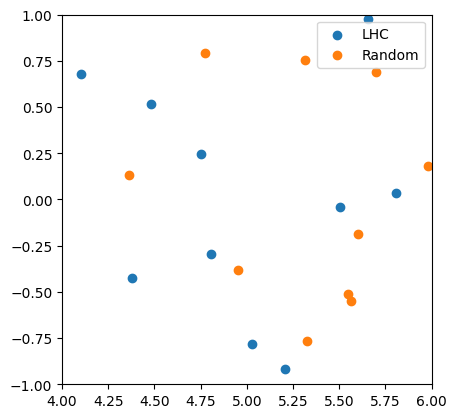

In [49]:
# Create 2-D scatter plot to visualise the generated data points
plt.scatter(initial_points_lhc["x1"], initial_points_lhc["x2"], label="LHC")
plt.scatter(initial_points_random["x1"], initial_points_random["x2"], label="Random")
plt.xlim(xmin1, xmax1)
plt.ylim(xmin2, xmax2)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

We can see that the recommended points are from different regions of the space and this is a good way to start with when there is no initial data at hand.

## **Three-dimensional plots**

To understand this better, let's also try visualising some 3D datapoints.

Like usual, we start with defining the priors for each dimension.

In [50]:
# Define the priors for the 3 dimensions
xmin1, xmax1 = 0, 1
xmin2, xmax2 = -1, 1
xmin3, xmax3 = 1, 5
num_samples = 20
prior_list = [
        tl.Prior("x1", tl.distribution.Uniform(xmin1, xmax1)),
        tl.Prior("x2", tl.distribution.Uniform(xmin2, xmax2)),
        tl.Prior("x3", tl.distribution.Uniform(xmin3, xmax3))
    ]

Generate some points in the 3D space using the Latin HyperCube Sampling method.

In [ ]:
# Initialise an emulator
new_emulator = tl.Emulator("3D_emulator")

# Define the InitialDesignParams object
params = tl.InitialDesignParams()

# Call the get_initial_design method to sample some data points with Latin Hypercube sampling
initial_points_lhc = emulator.get_initial_design(priors=prior_list, num_points=num_samples, InitialDesignParams=params)

display(initial_points_lhc)

Let's also do the same with Uniform Random Sampling for comparison.

In [ ]:
# Define the InitialDesignParams object with Uniform Random Sampling Method
params = tl.InitialDesignParams(sample_method=SamplingMethods.UNIFORM_RANDOM)

# Generate the points with Uniform Random sampling and display
initial_points_random = emulator.get_initial_design(priors=prior_list, num_points=num_samples, InitialDesignParams=params)

display(initial_points_random)

Let's plot a nice 3D visualisation of the data points generated using the `get_initial_design` method with both the Latin Hypercube and Uniform Random sampling schemes. Feel free to move the plot around an visualise the data across the various dimensions.  

In [56]:
# Create 3D scatter plot
fig = go.Figure()

# Add the first set of points
fig.add_trace(go.Scatter3d(x=initial_points_random["x1"], y=initial_points_random["x2"], z=initial_points_random["x3"], mode='markers', name='RANDOM'))

# Add the second set of points
fig.add_trace(go.Scatter3d(x=initial_points_lhc["x1"], y=initial_points_lhc["x2"], z=initial_points_lhc["x3"], mode='markers', name='LHC'))

# Set labels and title
fig.update_layout(scene=dict(xaxis_title='x1',
                             yaxis_title='x2',
                             zaxis_title='x3'),
                  title='3D Scatter Plot', width = 900, height = 600)

# Show plot
fig.show()

We can also visualise the two-dimensional projections of the sampled points. This can help us understand how the different sampling strategies are covering the design space across various dimensions.

In [57]:
# Set layout options
fig.update_layout(scene=dict(aspectmode='auto'))

# Create 2D projections on each plane
fig.update_layout(scene_camera=dict(eye=dict(x=2, y=0, z=0)), width = 600, height = 550)
fig.show()

fig.update_layout(scene_camera=dict(eye=dict(x=0, y=0, z=2)), width = 600, height = 550)
fig.show()

fig.update_layout(scene_camera=dict(eye=dict(x=0, y=2, z=0)), width = 600, height = 550)
fig.show()